In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [25]:
toyota = pd.read_csv("C:\\Users\\CHANDU\\Downloads\\ToyotaCorolla.csv",encoding = 'unicode_escape')
#toyota = pd.read_csv("C:\\Users\\CHANDU\\Downloads\\ToyotaCorolla.csv",encoding = "latin1") //works same as above code
toyota

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,1438,TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors,7500,69,12,1998,20544,Petrol,86,1,...,1,1,1,0,1,1,1,0,0,0
1432,1439,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,10845,72,9,1998,19000,Petrol,86,0,...,0,0,1,0,0,1,1,0,0,0
1433,1440,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,8500,71,10,1998,17016,Petrol,86,0,...,0,0,1,0,0,0,1,0,0,0
1434,1441,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,7250,70,11,1998,16916,Petrol,86,1,...,0,0,0,0,0,0,1,0,0,0


In [26]:
toyota.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 38 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Id                1436 non-null   int64 
 1   Model             1436 non-null   object
 2   Price             1436 non-null   int64 
 3   Age_08_04         1436 non-null   int64 
 4   Mfg_Month         1436 non-null   int64 
 5   Mfg_Year          1436 non-null   int64 
 6   KM                1436 non-null   int64 
 7   Fuel_Type         1436 non-null   object
 8   HP                1436 non-null   int64 
 9   Met_Color         1436 non-null   int64 
 10  Color             1436 non-null   object
 11  Automatic         1436 non-null   int64 
 12  cc                1436 non-null   int64 
 13  Doors             1436 non-null   int64 
 14  Cylinders         1436 non-null   int64 
 15  Gears             1436 non-null   int64 
 16  Quarterly_Tax     1436 non-null   int64 
 17  Weight        

In [27]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
toyota["Model"] = label_encoder.fit_transform(toyota["Model"])
toyota["Fuel_Type"] = label_encoder.fit_transform(toyota["Fuel_Type"])
toyota["Color"] = label_encoder.fit_transform(toyota["Color"])

In [28]:
toyota.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 38 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Id                1436 non-null   int64
 1   Model             1436 non-null   int32
 2   Price             1436 non-null   int64
 3   Age_08_04         1436 non-null   int64
 4   Mfg_Month         1436 non-null   int64
 5   Mfg_Year          1436 non-null   int64
 6   KM                1436 non-null   int64
 7   Fuel_Type         1436 non-null   int32
 8   HP                1436 non-null   int64
 9   Met_Color         1436 non-null   int64
 10  Color             1436 non-null   int32
 11  Automatic         1436 non-null   int64
 12  cc                1436 non-null   int64
 13  Doors             1436 non-null   int64
 14  Cylinders         1436 non-null   int64
 15  Gears             1436 non-null   int64
 16  Quarterly_Tax     1436 non-null   int64
 17  Weight            1436 non-null  

In [29]:
toyota.drop('Id', axis = 1)

,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,257,13500,23,10,2002,46986,1,90,1,2,...,1,1,1,0,0,0,1,0,0,0
1,257,13750,23,10,2002,72937,1,90,1,6,...,1,0,1,0,0,0,1,0,0,0
2,365,13950,24,9,2002,41711,1,90,1,2,...,0,0,1,0,0,0,1,0,0,0
3,257,14950,26,7,2002,48000,1,90,0,1,...,0,0,1,0,0,0,1,0,0,0
4,256,13750,30,3,2002,38500,1,90,0,1,...,1,1,1,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,5,7500,69,12,1998,20544,2,86,1,2,...,1,1,1,0,1,1,1,0,0,0
1432,8,10845,72,9,1998,19000,2,86,0,4,...,0,0,1,0,0,1,1,0,0,0
1433,8,8500,71,10,1998,17016,2,86,0,2,...,0,0,1,0,0,0,1,0,0,0
1434,8,7250,70,11,1998,16916,2,86,1,4,...,0,0,0,0,0,0,1,0,0,0


In [30]:
X = toyota.drop('Price', axis = 1)
Y = toyota.iloc[:, 2]

In [31]:
X

,Id,Model,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,257,23,10,2002,46986,1,90,1,2,...,1,1,1,0,0,0,1,0,0,0
1,2,257,23,10,2002,72937,1,90,1,6,...,1,0,1,0,0,0,1,0,0,0
2,3,365,24,9,2002,41711,1,90,1,2,...,0,0,1,0,0,0,1,0,0,0
3,4,257,26,7,2002,48000,1,90,0,1,...,0,0,1,0,0,0,1,0,0,0
4,5,256,30,3,2002,38500,1,90,0,1,...,1,1,1,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,1438,5,69,12,1998,20544,2,86,1,2,...,1,1,1,0,1,1,1,0,0,0
1432,1439,8,72,9,1998,19000,2,86,0,4,...,0,0,1,0,0,1,1,0,0,0
1433,1440,8,71,10,1998,17016,2,86,0,2,...,0,0,1,0,0,0,1,0,0,0
1434,1441,8,70,11,1998,16916,2,86,1,4,...,0,0,0,0,0,0,1,0,0,0


In [32]:
Y

0       13500
1       13750
2       13950
3       14950
4       13750
        ...  
1431     7500
1432    10845
1433     8500
1434     7250
1435     6950
Name: Price, Length: 1436, dtype: int64

In [33]:
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.20)
(x_train.shape, y_train.shape,x_test.shape, y_test.shape)

((1148, 37), (1148,), (288, 37), (288,))

In [34]:
# Apply multiple Linear Regression Model
lreg = LinearRegression()
lreg.fit(x_train, y_train)
# Generate Prediction on test set
lreg_y_pred = lreg.predict(x_test)
pred_train=lreg.predict(x_train)

In [35]:
# calculating Mean Squared Error (mse) for Test Data
mean_squared_error = np.mean((lreg_y_pred - y_test)**2)
print("Mean squared Error on test set : ", mean_squared_error)
# calculating Mean Squared Error (mse) for Train Data
mean_squared_error1 = np.mean((pred_train - y_train)**2)
print("Mean squared Error on train set : ", mean_squared_error1)

Mean squared Error on test set :  1258342.6177002059
Mean squared Error on train set :  1159255.9596180534


In [36]:
# Putting together the coefficient and their corrsponding variable names
lreg_coefficient = pd.DataFrame()
lreg_coefficient["Columns"] = x_train.columns
lreg_coefficient['Coefficient Estimate'] = pd.Series(lreg.coef_) 
print(lreg_coefficient)

             Columns  Coefficient Estimate
0                 Id          1.426302e+00
1              Model         -4.965208e-02
2          Age_08_04         -8.265362e+08
3          Mfg_Month         -8.265362e+08
4           Mfg_Year         -9.918433e+09
5                 KM         -1.120639e-02
6          Fuel_Type          1.148819e+03
7                 HP          2.057586e+01
8          Met_Color         -7.534196e+01
9              Color         -4.801414e+01
10         Automatic          2.879151e+02
11                cc         -9.518066e-02
12             Doors          2.525611e+01
13         Cylinders          3.108614e+04
14             Gears          3.262579e+02
15     Quarterly_Tax          1.284104e+01
16            Weight          1.240678e+01
17     Mfr_Guarantee          2.913514e+02
18   BOVAG_Guarantee          4.690051e+02
19  Guarantee_Period          6.005323e+01
20               ABS         -2.026349e+02
21          Airbag_1          3.612417e+02
22         

<AxesSubplot:xlabel='Coefficient Estimate', ylabel='Columns'>

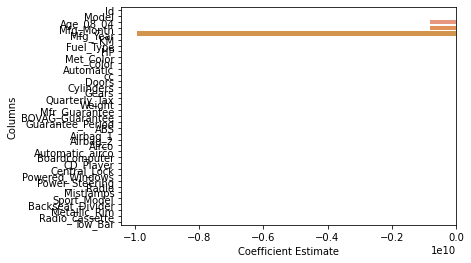

In [37]:
import seaborn as sns
sns.barplot(x='Coefficient Estimate' , y='Columns', data=lreg_coefficient)

In [38]:
# import ridge regression from sklearn library
from sklearn.linear_model import Ridge
# Train the model
ridgeR = Ridge(alpha = 1)
ridgeR.fit(x_train, y_train)
y_pred = ridgeR.predict(x_test)
# calculate mean square error
mean_squared_error_ridge = np.mean((y_pred - y_test)**2)
print(mean_squared_error_ridge)
# get ridge coefficient and print them
ridge_coefficient = pd.DataFrame()
ridge_coefficient["Columns"]= x_train.columns
ridge_coefficient['Coefficient Estimate'] = pd.Series(ridgeR.coef_)
print(ridge_coefficient)

1259586.0392999067
             Columns  Coefficient Estimate
0                 Id              1.436929
1              Model             -0.064286
2          Age_08_04           -151.784105
3          Mfg_Month           -128.392180
4           Mfg_Year             23.348024
5                 KM             -0.011251
6          Fuel_Type           1125.593830
7                 HP             20.834120
8          Met_Color            -75.814913
9              Color            -48.338465
10         Automatic            283.167467
11                cc             -0.092660
12             Doors             24.245730
13         Cylinders              0.000000
14             Gears            317.207173
15     Quarterly_Tax             12.705711
16            Weight             12.447440
17     Mfr_Guarantee            291.641035
18   BOVAG_Guarantee            463.841637
19  Guarantee_Period             59.584441
20               ABS           -202.293178
21          Airbag_1            349

<AxesSubplot:xlabel='Coefficient Estimate', ylabel='Columns'>

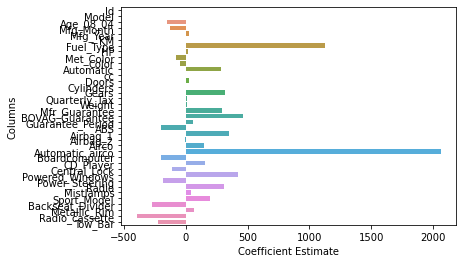

In [39]:
sns.barplot(x='Coefficient Estimate' , y='Columns', data=ridge_coefficient)

In [40]:
#### # import Lasso regression from sklearn library 

In [41]:
from sklearn.linear_model import Lasso
# Train the model
lasso = Lasso(alpha = 1)
lasso.fit(x_train, y_train)
y_pred1 = lasso.predict(x_test)
# Calculate Mean Squared Error
mean_squared_error = np.mean((y_pred1 - y_test)**2)
print("Mean squared error on test set", mean_squared_error)
lasso_coeff = pd.DataFrame()
lasso_coeff["Columns"] = x_train.columns
lasso_coeff['Coefficient Estimate'] = pd.Series(lasso.coef_)
print(lasso_coeff)

Mean squared error on test set 1257111.2955475515
             Columns  Coefficient Estimate
0                 Id              1.423058
1              Model             -0.082659
2          Age_08_04           -153.063847
3          Mfg_Month           -129.477266
4           Mfg_Year              0.000000
5                 KM             -0.011302
6          Fuel_Type           1135.743425
7                 HP             20.757867
8          Met_Color            -70.652658
9              Color            -48.466015
10         Automatic            262.044667
11                cc             -0.093802
12             Doors             19.889788
13         Cylinders              0.000000
14             Gears            293.721516
15     Quarterly_Tax             12.767549
16            Weight             12.484177
17     Mfr_Guarantee            288.075478
18   BOVAG_Guarantee            457.716692
19  Guarantee_Period             60.588111
20               ABS           -196.428380
21  

<AxesSubplot:xlabel='Coefficient Estimate', ylabel='Columns'>

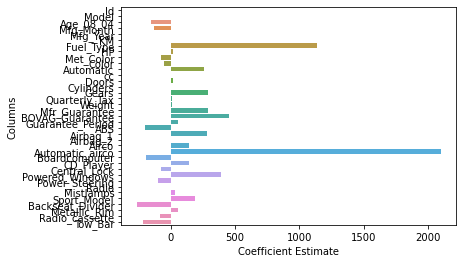

In [42]:
sns.barplot(x='Coefficient Estimate' , y='Columns', data=lasso_coeff)

In [43]:
# import model
from sklearn.linear_model import ElasticNet
# Train the model
e_net = ElasticNet(alpha = .4,l1_ratio=.5)
e_net.fit(x_train, y_train)
# calculate the prediction and mean square error
y_pred_elastic = e_net.predict(x_test)
mean_squared_error = np.mean((y_pred_elastic - y_test)**2)
print("Mean Squared Error on test set", mean_squared_error)
e_net_coeff = pd.DataFrame()
e_net_coeff["Columns"] = x_train.columns
e_net_coeff['Coefficient Estimate'] = pd.Series(e_net.coef_)
e_net_coeff

Mean Squared Error on test set 1460108.3696155732


,Columns,Coefficient Estimate
0,Id,1.985319
1,Model,-0.704041
2,Age_08_04,-170.879308
3,Mfg_Month,-148.567012
4,Mfg_Year,25.787200
5,KM,-0.012013
6,Fuel_Type,198.656222
7,HP,30.747414
8,Met_Color,-46.625501
9,Color,-51.587300


<AxesSubplot:xlabel='Coefficient Estimate', ylabel='Columns'>

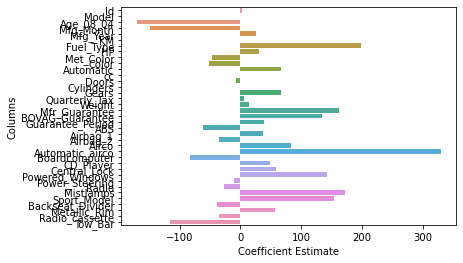

In [44]:
sns.barplot(x='Coefficient Estimate' , y='Columns', data=e_net_coeff)